# Image Recognition
##  Making predictions

In [88]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np


In [89]:
# These are the CIFAR10 class labels from the training data (in order from 0 to 9)
class_labels = [
    "Plane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

In [107]:
# Load the json file that contains the model's structure
model_structure_file = Path("model_structure_fromColab.json")
model_structure = model_structure_file.read_text()

In [ ]:
##If it's not in google Colab (ex. VScode), use this code below:
#script_location = Path(__file__).absolute().parent
#model_structure_file = script_location / "model_structure_fromColab.json"

In [91]:
# Recreate the Keras model object from the json data
model = model_from_json(model_structure)

In [106]:
# Re-load the model's trained weights
weight_file= Path("model_weights_fromColab.h5")
model.load_weights("model_weights_fromColab.h5")

In [104]:
# Load an image file to test, resizing it to 32x32 pixels (as required by this model)
img_file = Path("frog.png")
img = image.load_img(img_file, target_size=(32, 32))

In [94]:
# Convert the image to a numpy array
image_to_test = image.img_to_array(img) / 255

In [95]:
# Add a fourth dimension to the image (since Keras expects a list of images, not a single image)
list_of_images = np.expand_dims(image_to_test, axis=0)

In [96]:
# Make a prediction using the model
results = model.predict(list_of_images)

In [97]:
# Since we are only testing one image, we only need to check the first result
single_result = results[0]

In [98]:
# We will get a likelihood score for all 10 possible classes. Find out which class had the highest score.
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

In [99]:
# Get the name of the most likely class
class_label = class_labels[most_likely_class_index]

## Result

In [100]:
# Print the result
print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likelihood))

This is image is a Frog - Likelihood: 0.648692


### Print image

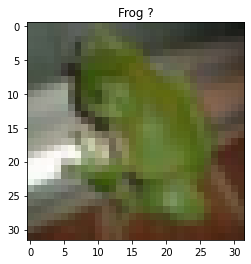

In [105]:
import matplotlib.pyplot as plt
img = image.load_img(img_file, target_size=(32, 32))
sample_image = img
# Draw the image as a plot
plt.imshow(sample_image)
# Label the image
plt.title(class_label +" ?")
# Show the plot on the screen
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')